In [1]:
%cd ..

/Users/pedrobedmar/GoogleDrive/MASTER_BIG_DATA/tfm/code


In [2]:
from etl.esios.provider import ESIOSDataProvider
from etl.generic_provider import GenericDataProvider

import pandas as pd
import numpy as np
from sktime.datatypes import check_raise
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series
from sktime.forecasting.arima import AutoARIMA
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

In [3]:
def forecasting_pipeline(y):
    y_train, y_test = temporal_train_test_split(y, test_size=36)

    plot_series(y_train, y_test, labels=["y_train", "y_test"]);
    fh = np.arange(1, 37)

    forecaster = AutoARIMA()

    forecaster.fit(y_train)
    y_pred = forecaster.predict(fh=fh)
    interval = forecaster.predict_interval(coverage=0.9, fh=fh)

    plot_series(y, y_pred, labels=["y", "y_pred"], pred_interval=interval)
    mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

In [ ]:
esios_provider = ESIOSDataProvider()
esios_tickers = esios_provider.get_tickers()

omie_provider = GenericDataProvider("datalake/clean/omie/", want_metadata=False, tickers=["PRECIO_OMIE"])
investing_provider = GenericDataProvider("datalake/clean/investingdotcom/", want_metadata=False, tickers=["DAILY_TTF_PRICE", "MONTHLY_TTF_PRICE"])
marketwatch_provider = GenericDataProvider("datalake/clean/marketwatch/", want_metadata=False, tickers=["DAILY_COAL_PRICE"])
world_bank_provider = GenericDataProvider("datalake/clean/world_bank/", want_metadata=False, tickers=["GDP"])

## Non grouped data

In [45]:
esios_demand = esios_provider.get_series(esios_tickers[0], freq="H")
esios_spot = esios_provider.get_series(esios_tickers[-1], freq="H")
esios_generation = esios_provider.get_series(esios_tickers[1], freq="H")
for ticker in esios_tickers[2:-1]:
    esios_gen = esios_provider.get_series(ticker, freq="H")
    esios_generation = pd.concat([esios_generation, esios_gen], axis=1)

omie_price = omie_provider.get_series("PRECIO_OMIE", freq="H")
daily_ttf_price = investing_provider.get_series("DAILY_TTF_PRICE", freq="D")
monthly_ttf_price = investing_provider.get_series("MONTHLY_TTF_PRICE", freq="M")
daily_coal_price = marketwatch_provider.get_series("DAILY_COAL_PRICE", freq="D")
gdp = world_bank_provider.get_series("GDP", freq="Y")

In [46]:
esios_tickers

['DEMANDA_REAL',
 'GENERACIÓN_MEDIDA_TOTAL',
 'GENERACIÓN_MEDIDA_EÓLICA_TERRESTRE',
 'GENERACIÓN_MEDIDA_CICLO_COMBINADO',
 'GENERACIÓN_MEDIDA_DERIVADOS_DEL_PETRÓLEO_Ó_CARBÓN',
 'GENERACIÓN_MEDIDA_GAS_NATURAL_COGENERACIÓN',
 'GENERACIÓN_MEDIDA_HIDRÁULICA',
 'GENERACIÓN_MEDIDA_NUCLEAR',
 'GENERACIÓN_MEDIDA_SOLAR_FOTOVOLTAICA',
 'PRECIO_MERCADO_SPOT_DIARIO']

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='DEMANDA_REAL'>)

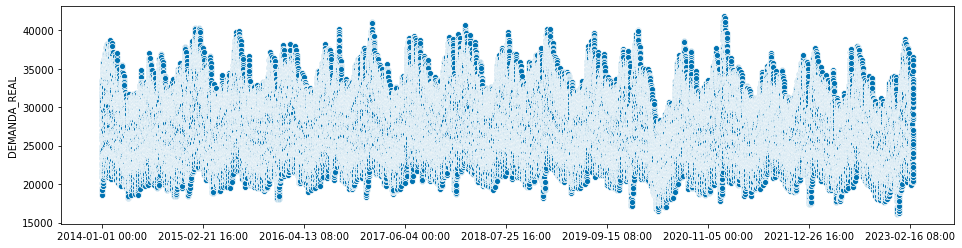

In [47]:
plot_series(esios_demand)

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='PRECIO_MERCADO_SPOT_DIARIO'>)

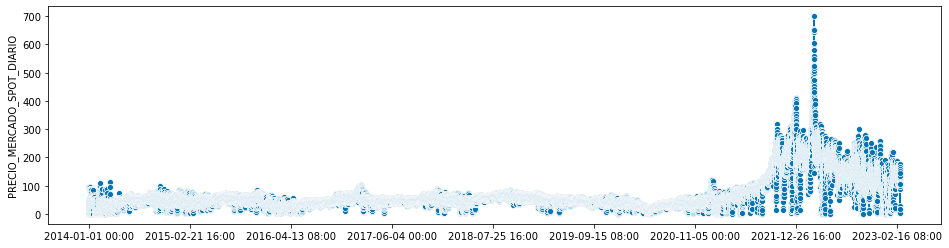

In [32]:
plot_series(esios_spot)

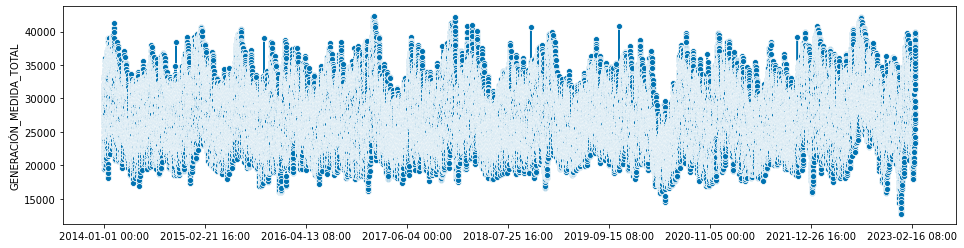

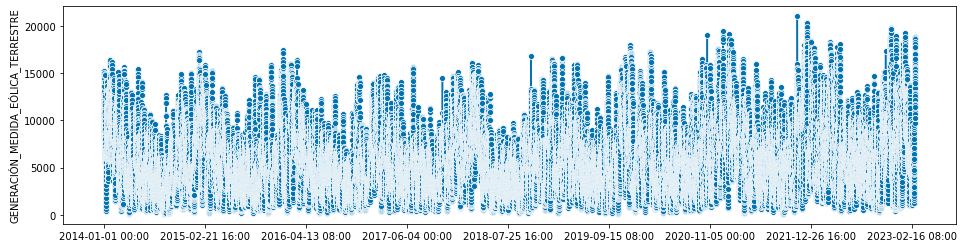

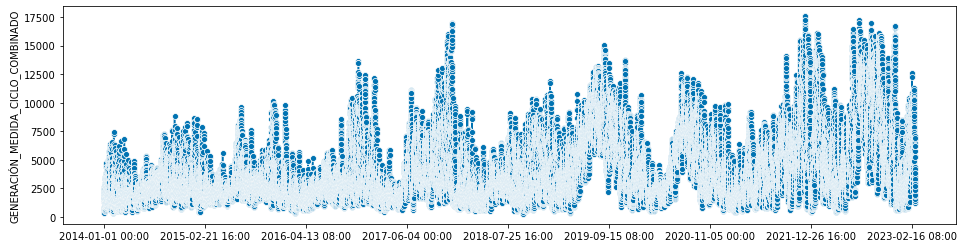

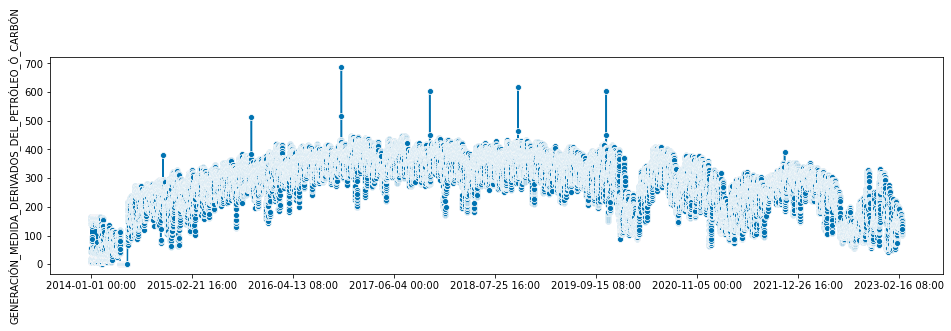

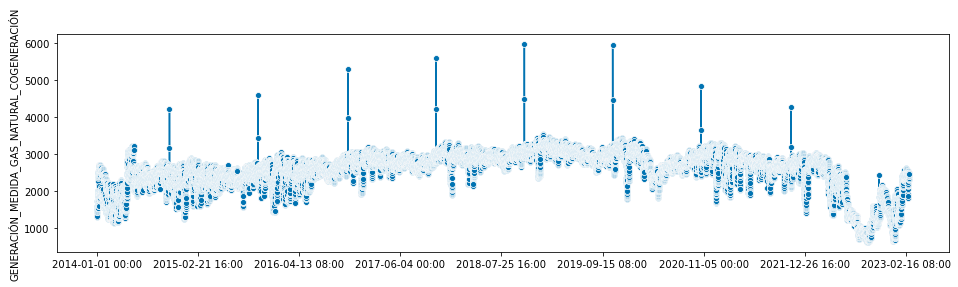

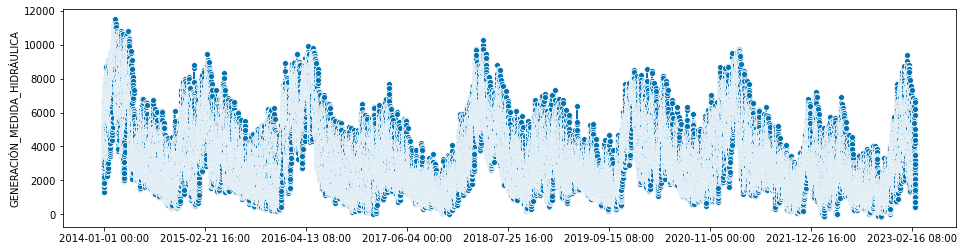

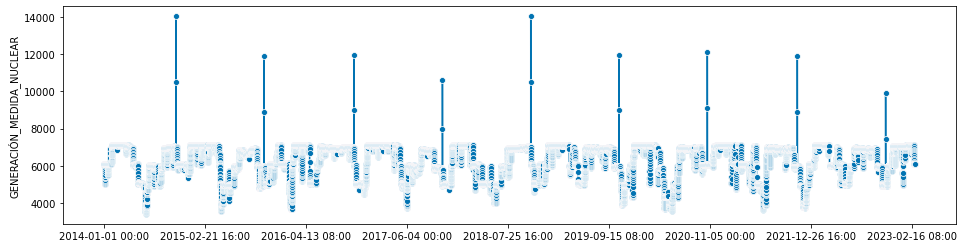

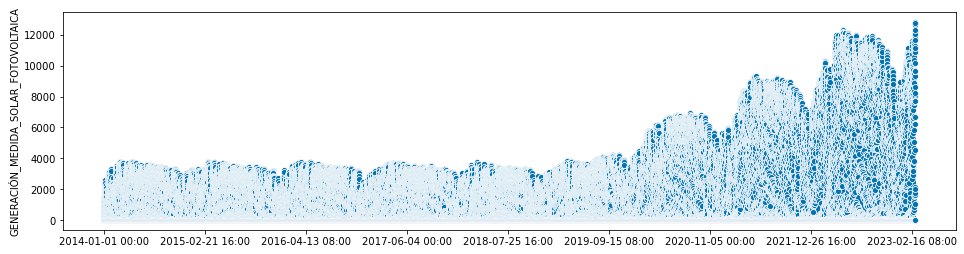

In [24]:
for series in esios_generation:
    plot_series(esios_generation[series])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='PRECIO_OMIE'>)

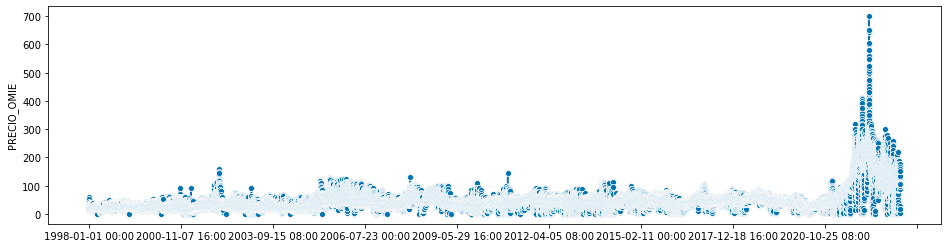

In [26]:
plot_series(omie_price)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='MONTHLY_TTF_PRICE'>)

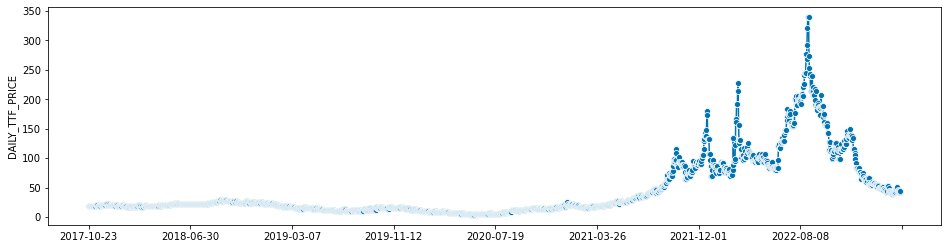

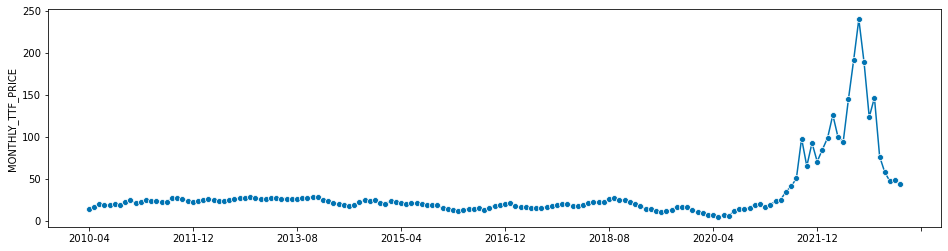

In [27]:
plot_series(daily_ttf_price)
plot_series(monthly_ttf_price)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='DAILY_COAL_PRICE'>)

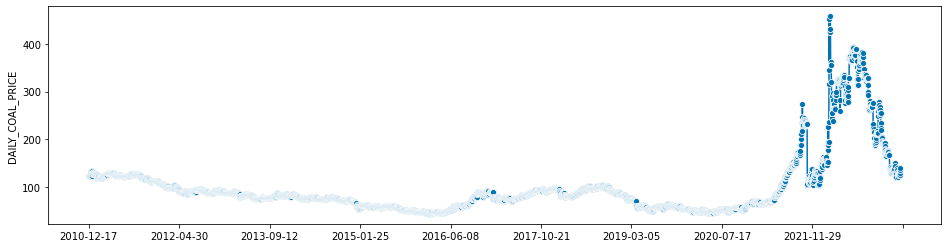

In [28]:
plot_series(daily_coal_price)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='GDP'>)

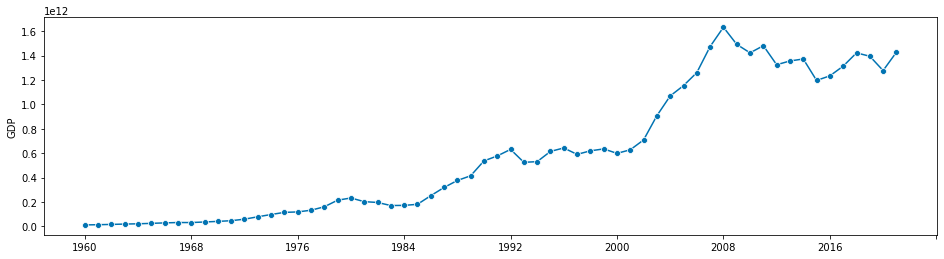

In [29]:
plot_series(gdp)

## Grouped by month

In [36]:
esios_demand_month = esios_provider.get_series(esios_tickers[0], freq="H", resample_by="M", group_mode="sum")
esios_spot_month = esios_provider.get_series(esios_tickers[-1], freq="H", resample_by="M", group_mode="mean")
esios_generation_month = esios_provider.get_series(esios_tickers[1], freq="H", resample_by="M", group_mode="sum")
for ticker in esios_tickers[2:-1]:
    esios_gen_month = esios_provider.get_series(ticker, freq="H", resample_by="M", group_mode="sum")
    esios_generation_month = pd.concat([esios_generation_month, esios_gen_month], axis=1)

omie_price_month = omie_provider.get_series("PRECIO_OMIE", freq="H", resample_by="M", group_mode="mean")
daily_ttf_price_month = investing_provider.get_series("DAILY_TTF_PRICE", freq="D", resample_by="M", group_mode="mean")
daily_coal_price_month = marketwatch_provider.get_series("DAILY_COAL_PRICE", freq="D", resample_by="M", group_mode="mean")

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='DEMANDA_REAL'>)

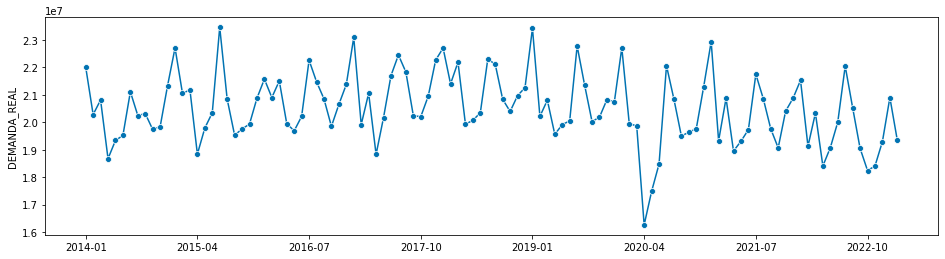

In [38]:
plot_series(esios_demand_month)

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='PRECIO_MERCADO_SPOT_DIARIO'>)

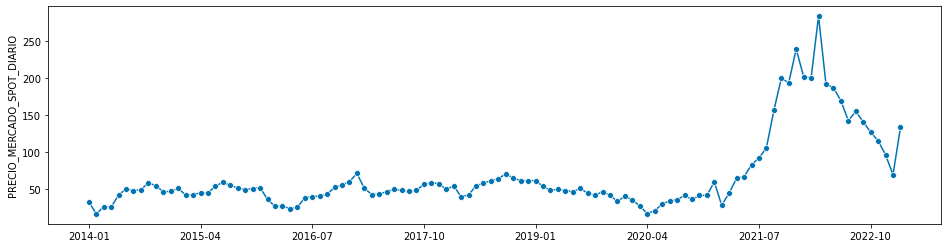

In [39]:
plot_series(esios_spot_month)

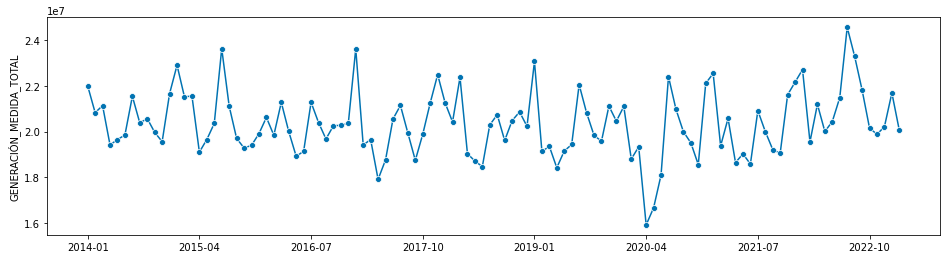

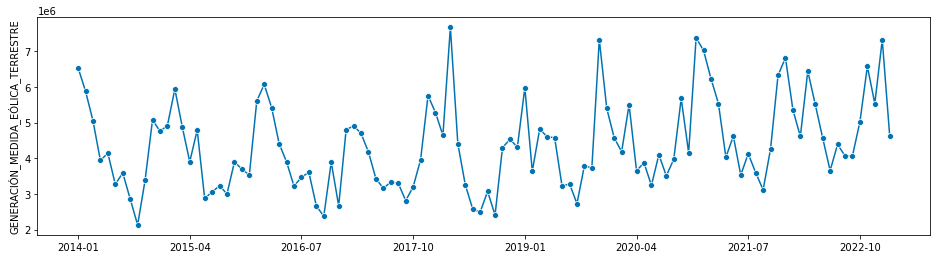

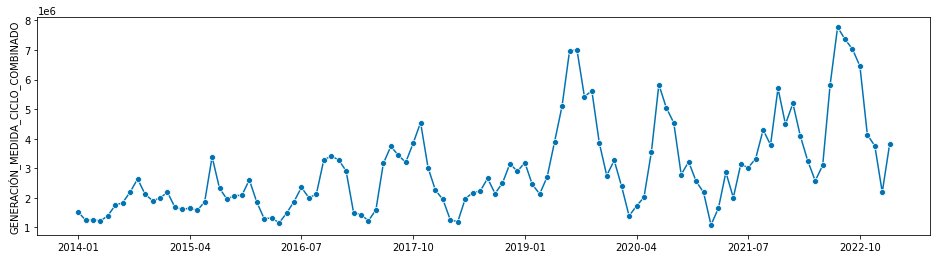

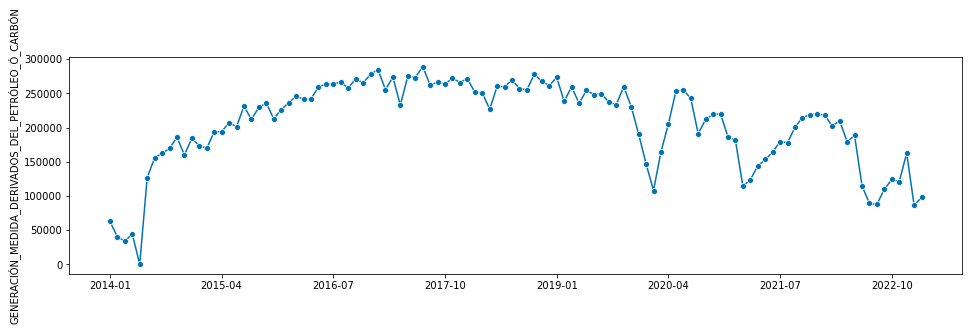

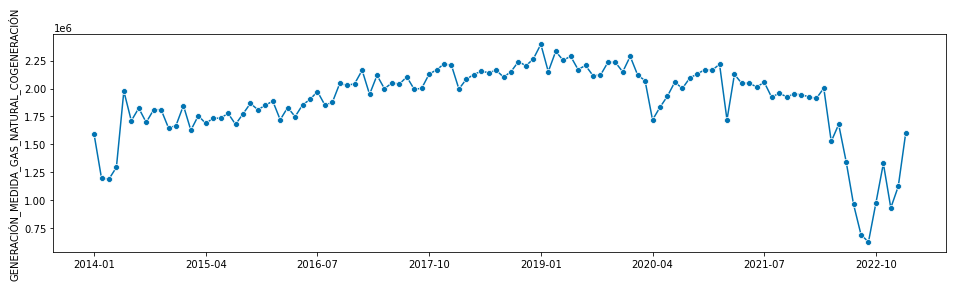

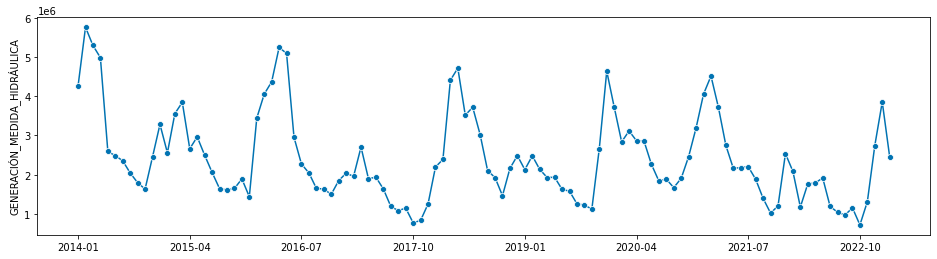

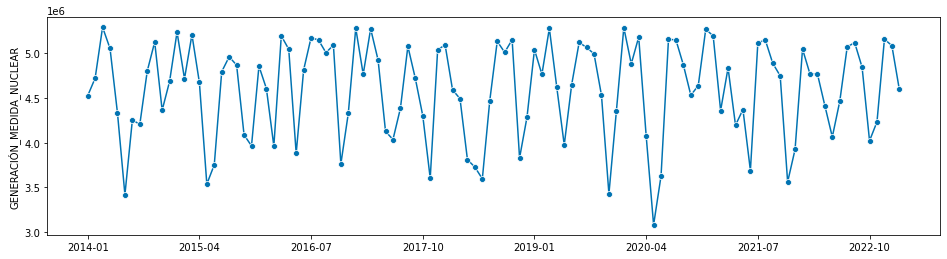

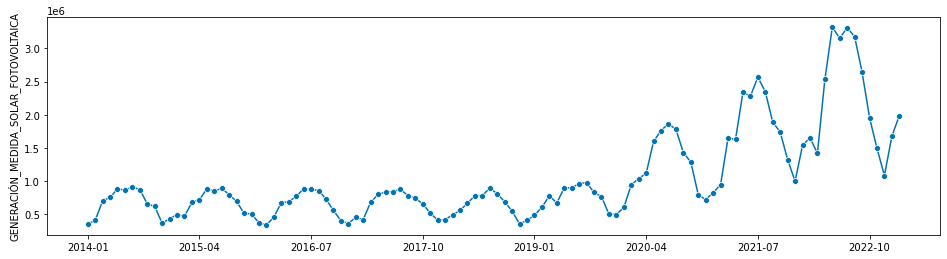

In [41]:
for series in esios_generation_month:
    plot_series(esios_generation_month[series])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='PRECIO_OMIE'>)

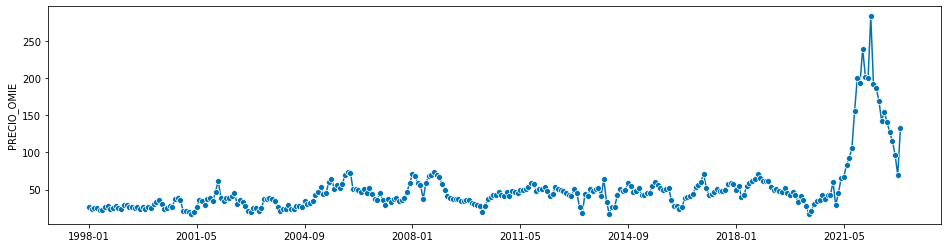

In [42]:
plot_series(omie_price_month)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='DAILY_TTF_PRICE'>)

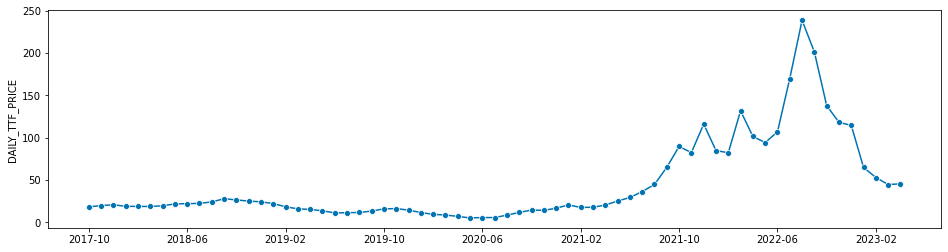

In [43]:
plot_series(daily_ttf_price_month)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='DAILY_COAL_PRICE'>)

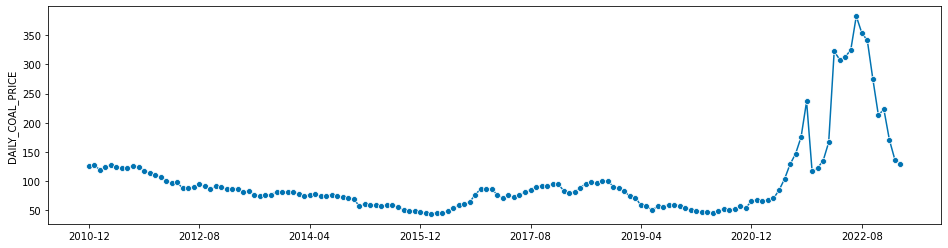

In [44]:
plot_series(daily_coal_price_month)